In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,root_mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import optuna
import seaborn as sns
from optuna.pruners import SuccessiveHalvingPruner,MedianPruner
import joblib

d:\Code files\Used Car Price Prediction\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
from dotenv import load_dotenv
load_dotenv()
os.environ['KAGGLE_USERNAME']=os.getenv('KAGGLE_USERNAME')
os.environ['KAGGLE_KEY']=os.getenv('KAGGLE_KEY')

In [3]:
import kagglehub

# This automatically downloads and unzips the dataset to ~/.kagglehub
path = kagglehub.dataset_download("adityadesai13/used-car-dataset-ford-and-mercedes")

print("Path to dataset files:", path)


Path to dataset files: C:\Users\aishw\.cache\kagglehub\datasets\adityadesai13\used-car-dataset-ford-and-mercedes\versions\3


In [4]:
os.listdir(path)

['audi.csv',
 'bmw.csv',
 'cclass.csv',
 'focus.csv',
 'ford.csv',
 'hyundi.csv',
 'merc.csv',
 'skoda.csv',
 'toyota.csv',
 'unclean cclass.csv',
 'unclean focus.csv',
 'vauxhall.csv',
 'vw.csv']

In [5]:
audi_path=os.path.join(path,'audi.csv')
bmw_path=os.path.join(path,'bmw.csv')
cclass_path=os.path.join(path,'cclass.csv')
focus_path=os.path.join(path,'focus.csv')
ford_path=os.path.join(path,'ford.csv')
hyundi_path=os.path.join(path,'hyundi.csv')
merc_path=os.path.join(path,'merc.csv')
skoda_path=os.path.join(path,'skoda.csv')
toyota_path=os.path.join(path,'toyota.csv')
unclean_cclass_path=os.path.join(path,'unclean cclass.csv')
unclean_focus_path=os.path.join(path,'unclean focus.csv')
vauxhall_path=os.path.join(path,'vauxhall.csv')
vw_path=os.path.join(path,'vw.csv')

In [6]:
audi_data=pd.read_csv(audi_path)
bmw_data=pd.read_csv(bmw_path)
cclass_data=pd.read_csv(cclass_path)
focus_data=pd.read_csv(focus_path)
ford_data=pd.read_csv(ford_path)
hyundi_data=pd.read_csv(hyundi_path)
merc_data=pd.read_csv(merc_path)
skoda_data=pd.read_csv(skoda_path)
toyota_data=pd.read_csv(toyota_path)
unclean_cclass_data=pd.read_csv(unclean_cclass_path)
unclean_focus_data=pd.read_csv(unclean_focus_path)
merc_data=pd.read_csv(merc_path)
vw_data=pd.read_csv(vw_path)

In [8]:
dfs = [
    audi_data,
    bmw_data,
    cclass_data,
    focus_data,
    ford_data,
    hyundi_data,
    merc_data,
    skoda_data,
    toyota_data,
    unclean_cclass_data,
    unclean_focus_data,
    vw_data
]

# Get the columns of the first DataFrame as a set
base_columns = set(dfs[0].columns)

# Check if all other DataFrames have the same columns
all_same_columns = all(set(df.columns) == base_columns for df in dfs)

print("All DataFrames have the same columns:", all_same_columns)

All DataFrames have the same columns: False


In [9]:
print(audi_data.columns)
print(bmw_data.columns)
print(cclass_data.columns)
print(focus_data.columns)
print(ford_data.columns)
print(hyundi_data.columns)
print(merc_data.columns)
print(skoda_data.columns)
print(toyota_data.columns)
print(unclean_cclass_data.columns)
print(unclean_focus_data.columns)
print(vw_data.columns)

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'engineSize'],
      dtype='object')
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'engineSize'],
      dtype='object')
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType',
       'tax(£)', 'mpg', 'engineSize'],
      dtype='object')
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      d

In [10]:
hyundi_data=hyundi_data.rename(columns={'tax(£)':'tax'})
hyundi_data


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0
...,...,...,...,...,...,...,...,...,...
4855,I30,2016,8680,Manual,25906,Diesel,0,78.4,1.6
4856,I40,2015,7830,Manual,59508,Diesel,30,65.7,1.7
4857,I10,2017,6830,Manual,13810,Petrol,20,60.1,1.0
4858,Tucson,2018,13994,Manual,23313,Petrol,145,44.8,1.6


## Fill the columns with NAN if not present

In [11]:
columns_to_add=[focus_data,cclass_data]
columns=['tax','mpg']
for df in columns_to_add:
    for col in columns:
        if col not in df.columns:
            df[col]=np.nan

In [12]:
dfs = [
    audi_data,
    bmw_data,
    cclass_data,
    focus_data,
    ford_data,
    hyundi_data,
    merc_data,
    skoda_data,
    toyota_data,
    vw_data
]

# Get the columns of the first DataFrame as a set
base_columns = set(dfs[0].columns)

# Check if all other DataFrames have the same columns
all_same_columns = all(set(df.columns) == base_columns for df in dfs)

print("All DataFrames have the same columns:", all_same_columns)

All DataFrames have the same columns: True


In [13]:
data=pd.concat(dfs,ignore_index=True)
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0


In [14]:
data.shape

(94908, 9)

In [14]:
data.isnull().sum()

model              0
year               0
price              0
transmission       0
mileage            0
fuelType           0
tax             9353
mpg             9353
engineSize         0
dtype: int64

In [15]:
data['tax']=data['tax'].fillna(value=data['tax'].median())
data['mpg']=data['mpg'].fillna(value=data['mpg'].median())

data.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [16]:
data.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax             float64
mpg             float64
engineSize      float64
dtype: object

## Data Visualizations

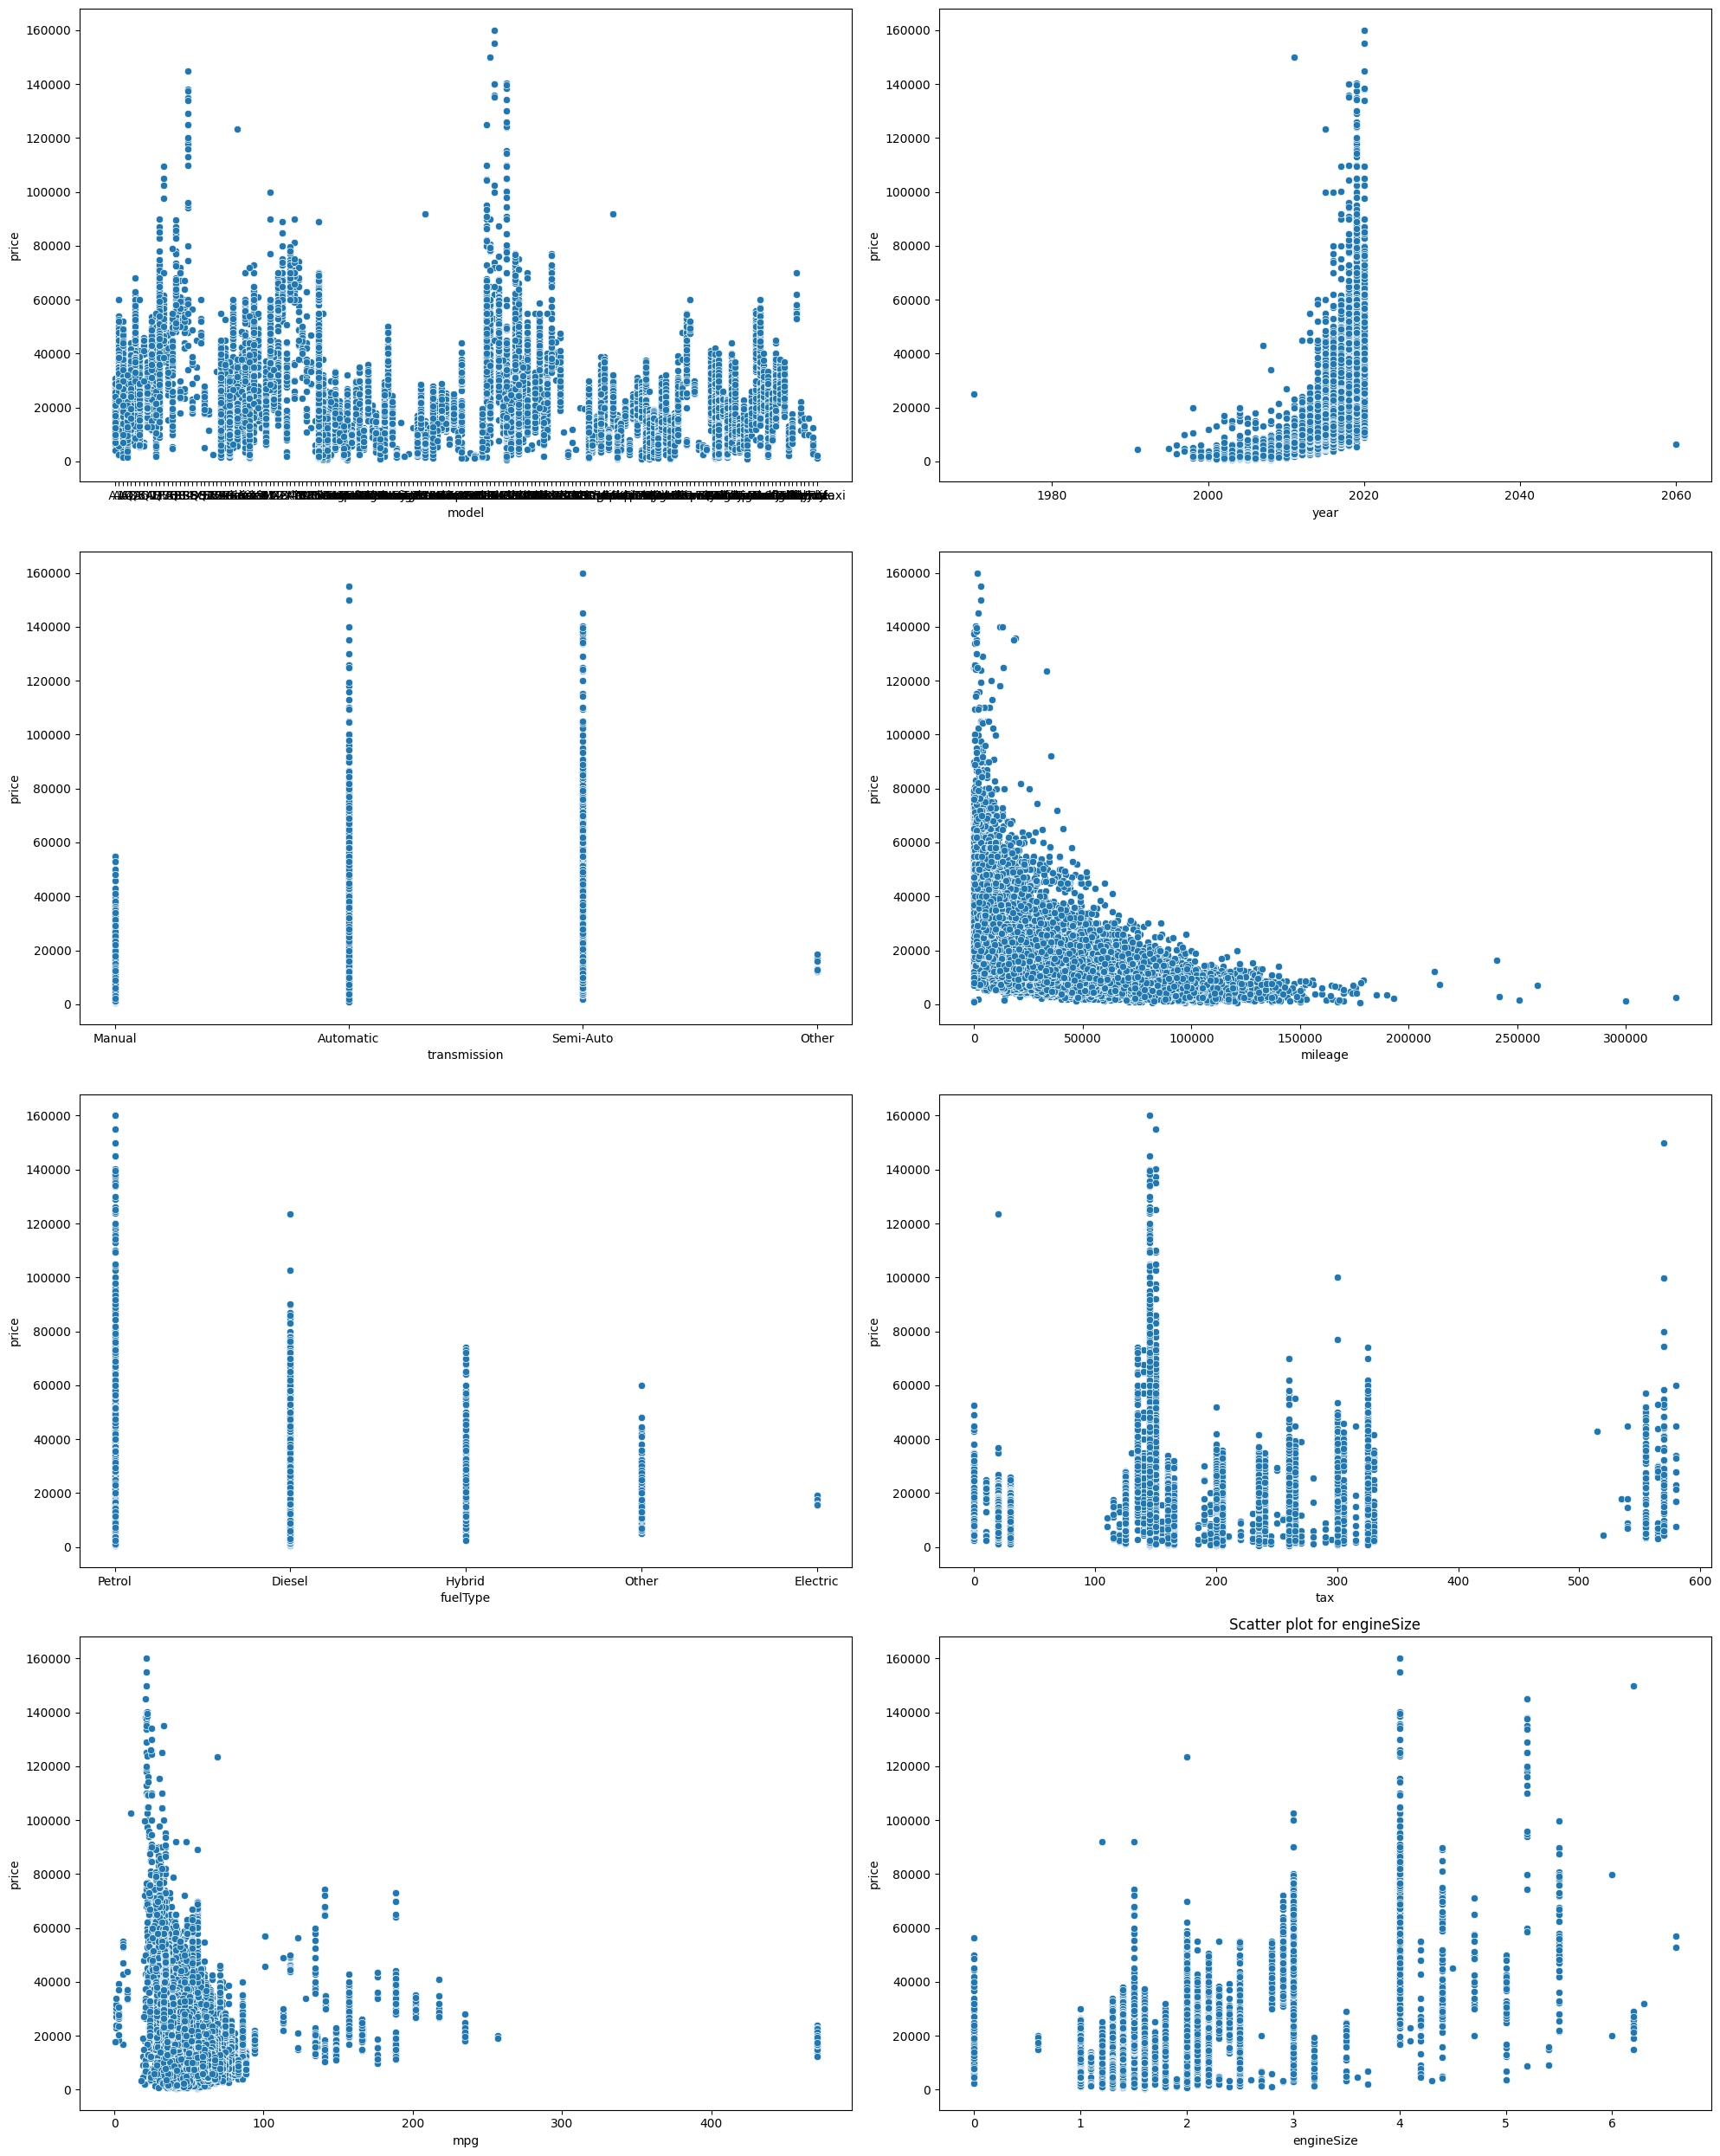

In [87]:
fig,axes=plt.subplots(4,2,figsize=(20,25))
axes=axes.flatten()
data_cols=data.drop(columns=['price']).columns
for ax,col in zip(axes,data_cols):
    sns.scatterplot(x=col,y='price',data=data,ax=ax)
    plt.title(f'Scatter plot for {col}')
    plt.xlabel(col)
    plt.ylabel('price')
plt.tight_layout()
plt.show()

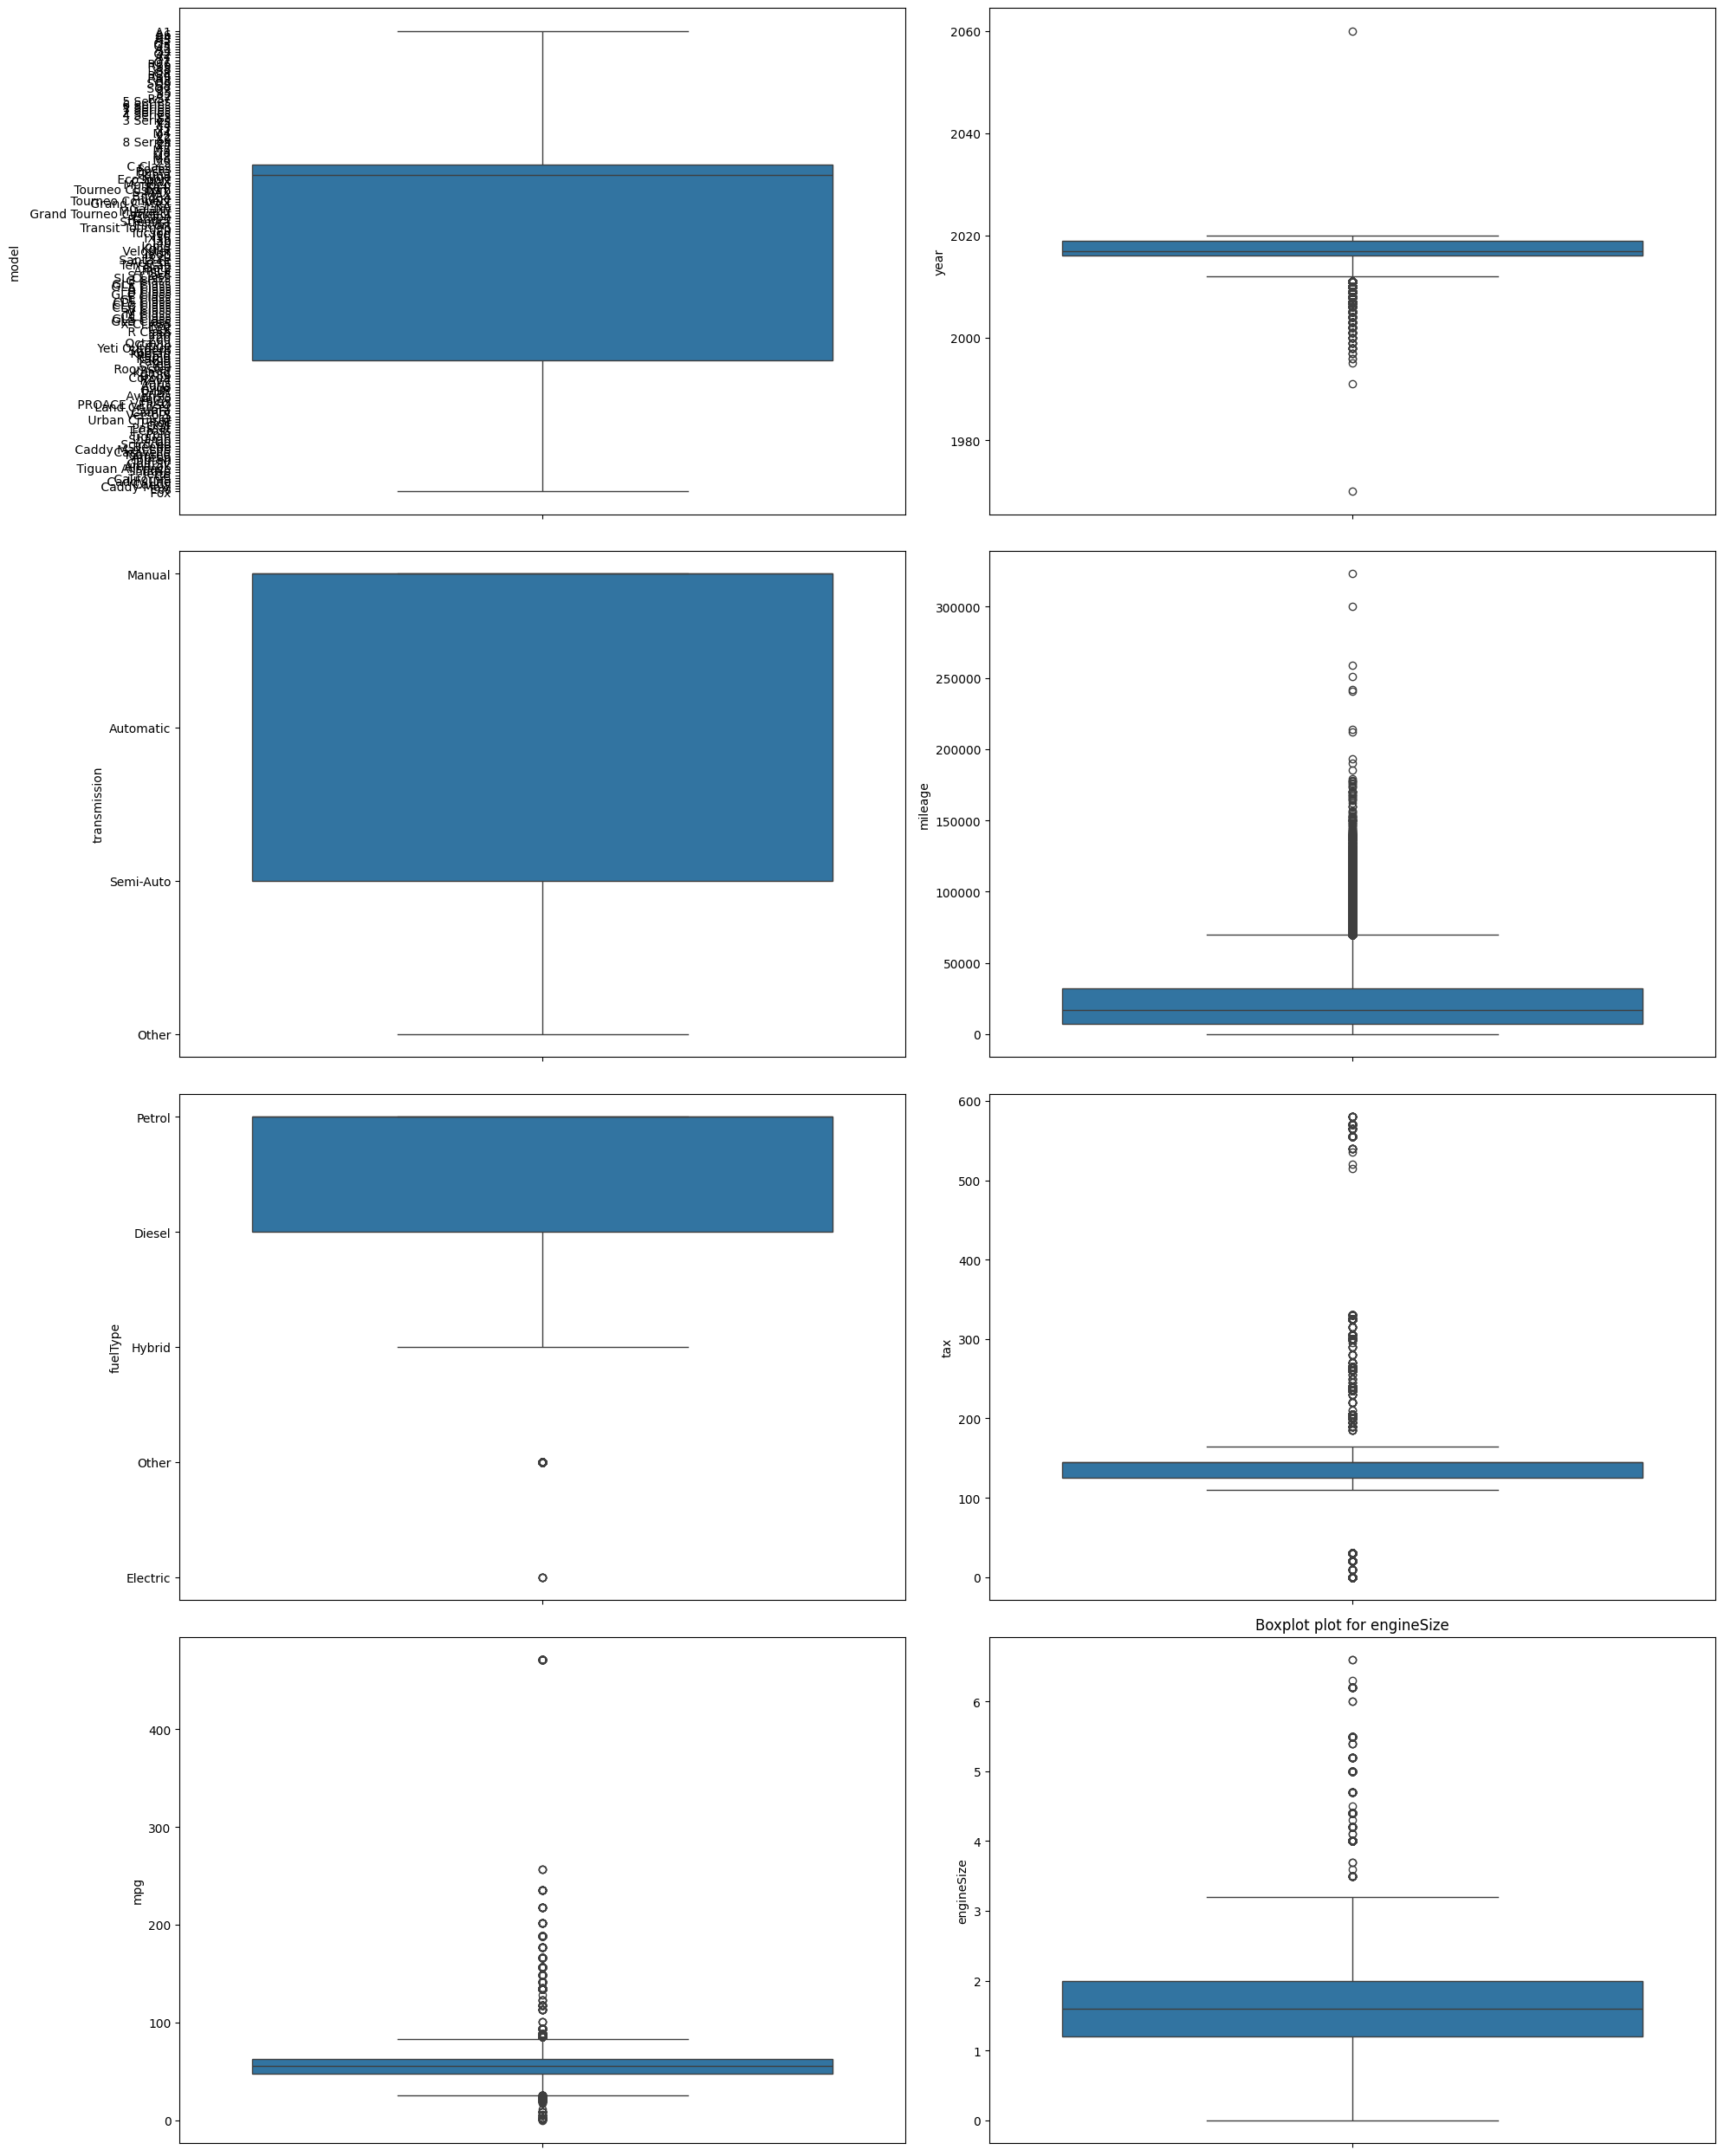

In [ ]:
fig,axes=plt.subplots(4,2,figsize=(20,25))
axes=axes.flatten()
data_cols=data.drop(columns=['price']).columns
for ax,col in zip(axes,data_cols):
    sns.boxplot(y=col,data=data,ax=ax)
    ax.set_title(f'Boxplot plot for {col}')
    ax.set_ylabel(col)
plt.tight_layout()
plt.show()

In [ ]:
fig,axes=plt.subplots(4,2,figsize=(20,25))
axes=axes.flatten()
data_cols=data.drop(columns=['price']).columns
for ax,col in zip(axes,data_cols):
    sns.boxplot(y=col,x='price',data=data,ax=ax)
    plt.title(f'Box plot for {col}')
    plt.xlabel('price')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

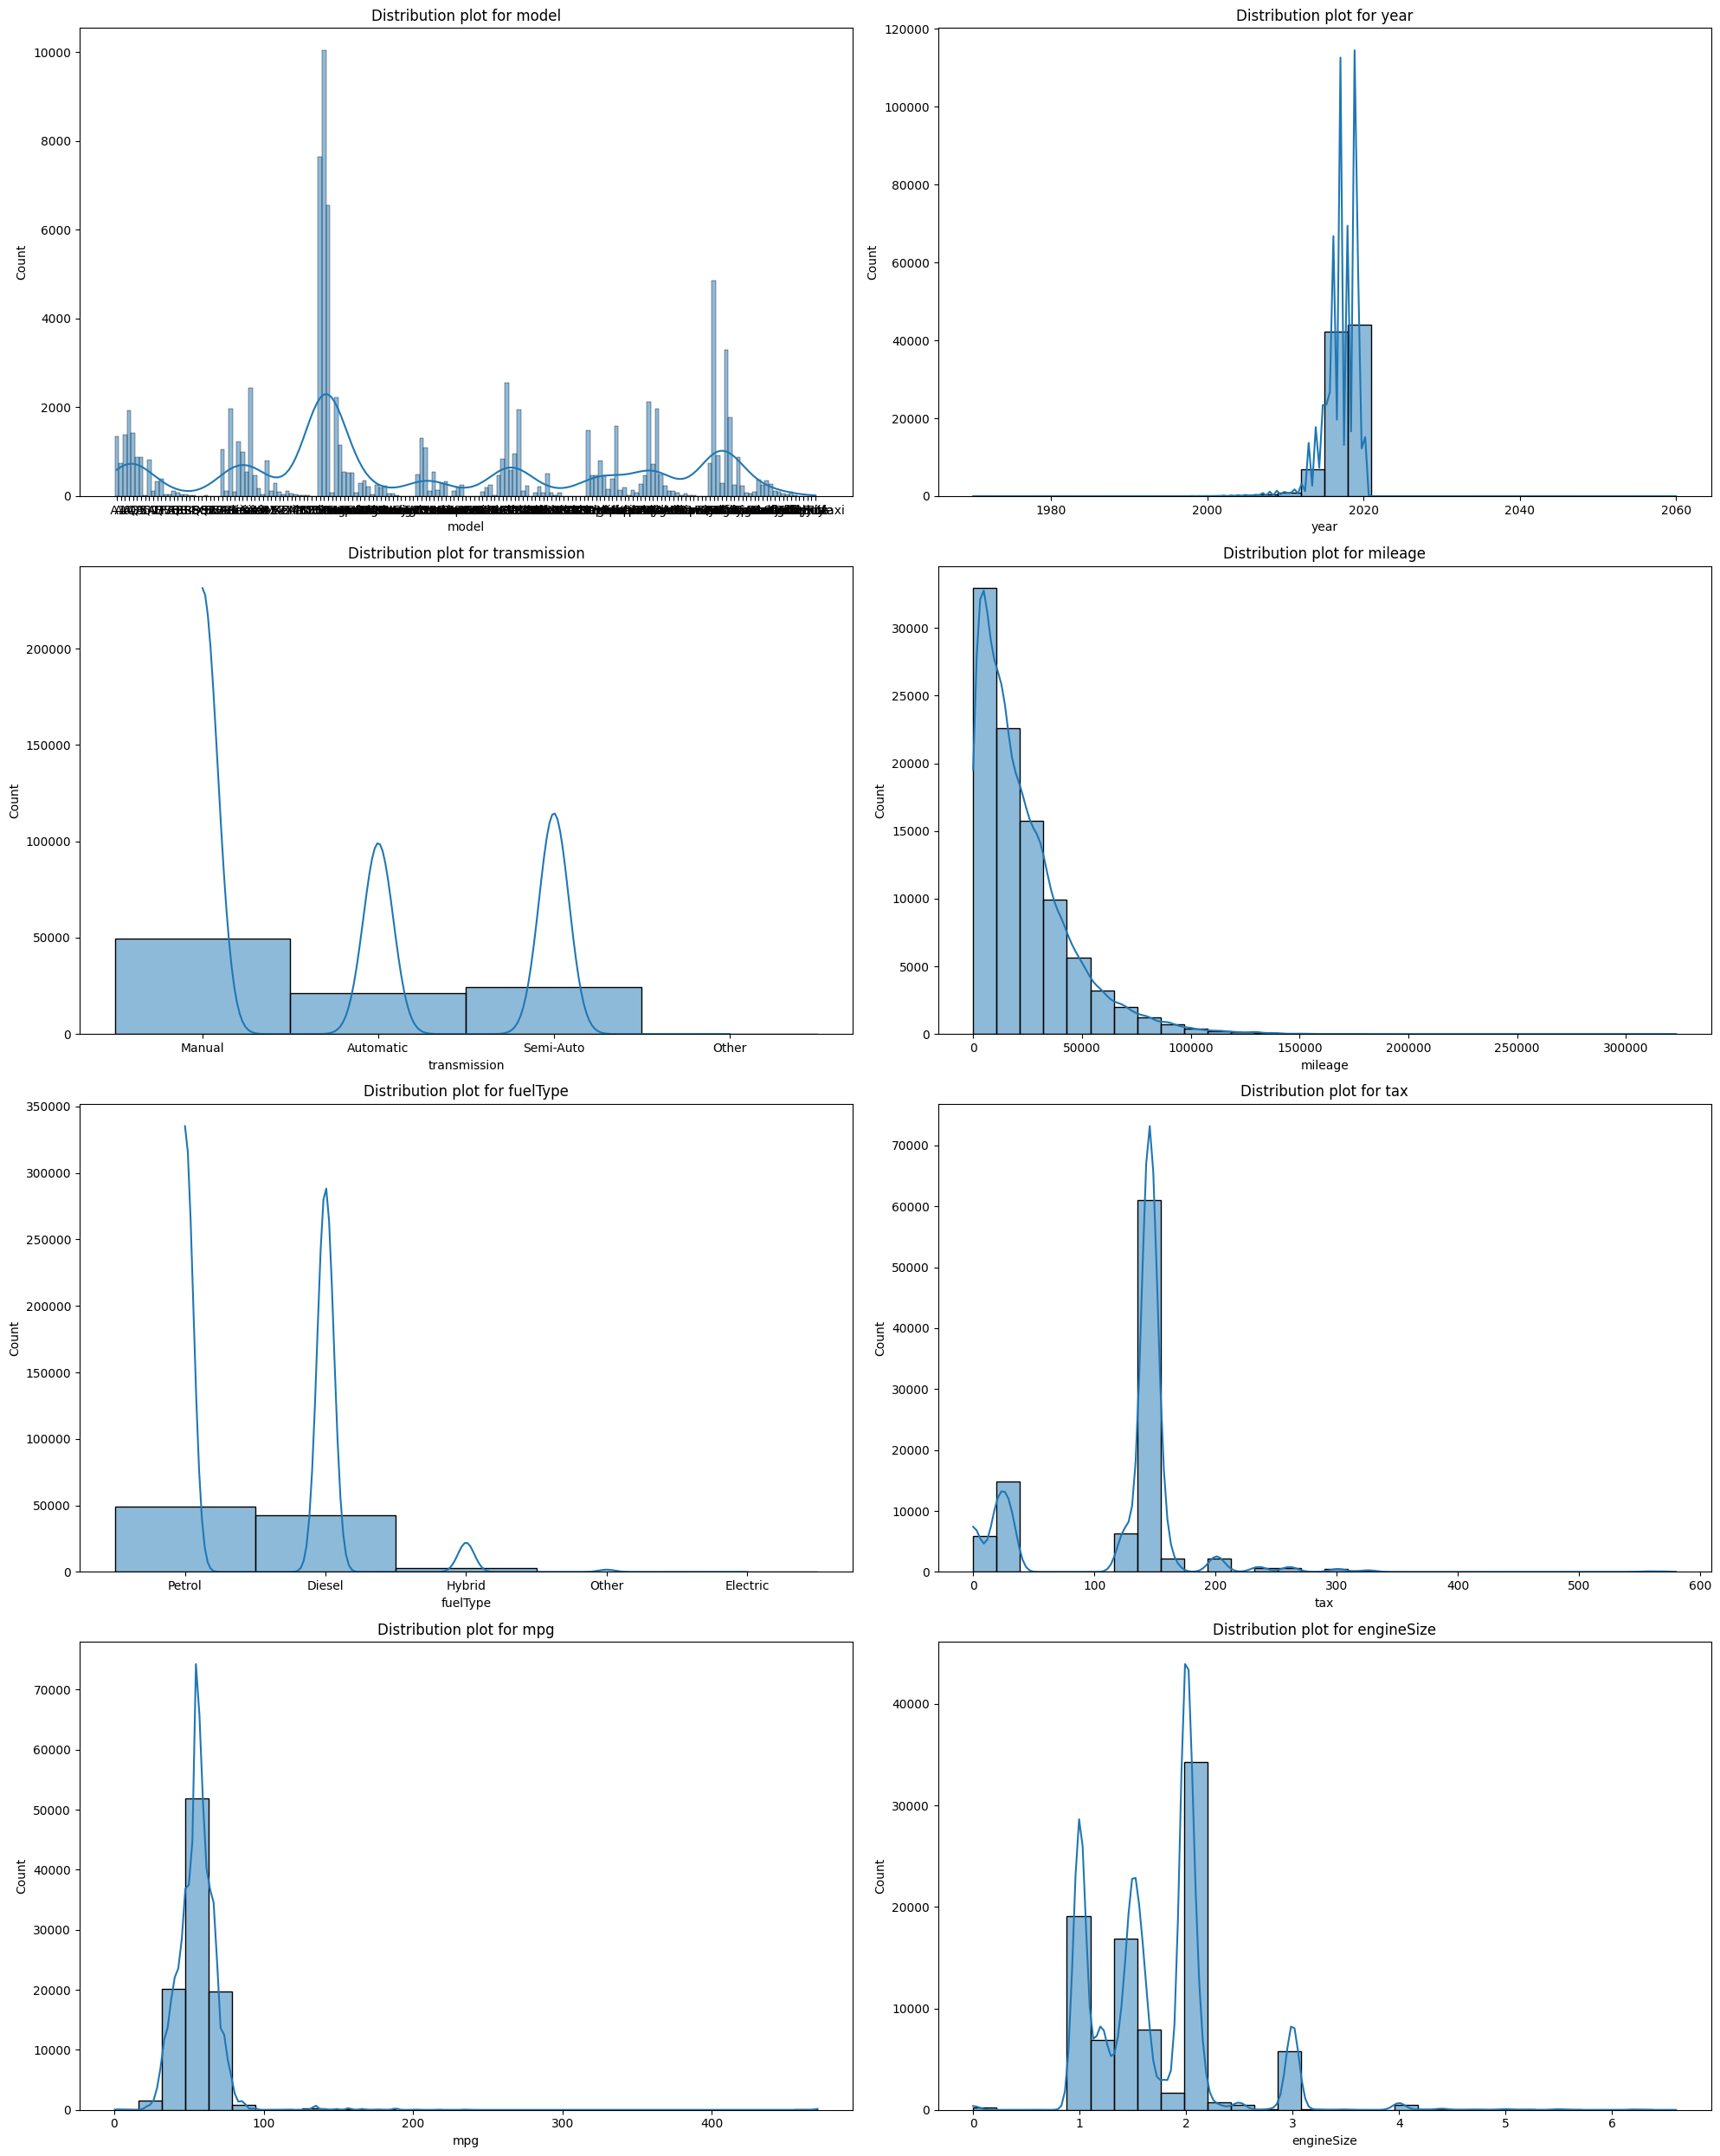

In [96]:
fig, axes = plt.subplots(4, 2, figsize=(20, 25))
axes = axes.flatten()

data_cols = data.drop(columns=['price']).columns

for ax, col in zip(axes, data_cols):
    sns.histplot(data[col], kde=True,bins=30, ax=ax)
    ax.set_title(f'Distribution plot for {col}')
    ax.set_xlabel(col)

plt.tight_layout()
plt.show()


In [16]:
cat_cols=[col for col in data.columns if data[col].dtype==object]
df[cat_cols]

,model,transmission,fuelType
0,C Class,Automatic,Diesel
1,C Class,Automatic,Petrol
2,C Class,Automatic,Diesel
3,C Class,Automatic,Diesel
4,C Class,Automatic,Diesel
...,...,...,...
3894,C Class,Manual,Diesel
3895,C Class,Automatic,Diesel
3896,C Class,Manual,Diesel
3897,C Class,Automatic,Diesel


In [17]:
unique={}
for col in cat_cols:
    unique[col]=data[col].unique()

In [19]:
unique

{'model': array([' A1', ' A6', ' A4', ' A3', ' Q3', ' Q5', ' A5', ' S4', ' Q2',
        ' A7', ' TT', ' Q7', ' RS6', ' RS3', ' A8', ' Q8', ' RS4', ' RS5',
        ' R8', ' SQ5', ' S8', ' SQ7', ' S3', ' S5', ' A2', ' RS7',
        ' 5 Series', ' 6 Series', ' 1 Series', ' 7 Series', ' 2 Series',
        ' 4 Series', ' X3', ' 3 Series', ' X5', ' X4', ' i3', ' X1', ' M4',
        ' X2', ' X6', ' 8 Series', ' Z4', ' X7', ' M5', ' i8', ' M2',
        ' M3', ' M6', ' Z3', ' C Class', ' Focus', ' Fiesta', ' Puma',
        ' Kuga', ' EcoSport', ' C-MAX', ' Mondeo', ' Ka+',
        ' Tourneo Custom', ' S-MAX', ' B-MAX', ' Edge', ' Tourneo Connect',
        ' Grand C-MAX', ' KA', ' Galaxy', ' Mustang',
        ' Grand Tourneo Connect', ' Fusion', ' Ranger', ' Streetka',
        ' Escort', ' Transit Tourneo', ' I20', ' Tucson', ' I10', ' IX35',
        ' I30', ' I40', ' Ioniq', ' Kona', ' Veloster', ' I800', ' IX20',
        ' Santa Fe', ' Accent', ' Terracan', ' Getz', ' Amica', ' SLK',
        '

In [18]:
##One hot encoding
ohe_cols=['transmission','fuelType']
import category_encoders as ce
ohe=ce.OneHotEncoder(ohe_cols,return_df=True,handle_unknown='return_nan',use_cat_names=True)
data_encoded=ohe.fit_transform(data[ohe_cols])
data_encoded


,transmission_Manual,transmission_Automatic,transmission_Semi-Auto,transmission_Other,fuelType_Petrol,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Electric
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
94903,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
94904,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
94905,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
94906,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [19]:
joblib.dump(ohe, 'preprocessors/ohe_encoder.pkl')

['preprocessors/ohe_encoder.pkl']

In [20]:
data_clean=pd.concat([data,data_encoded],axis=1)
data_clean.drop(columns=ohe_cols,inplace=True)
data_clean

,model,year,price,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Automatic,transmission_Semi-Auto,transmission_Other,fuelType_Petrol,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Electric
0,A1,2017,12500,15735,150.0,55.4,1.4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,A6,2016,16500,36203,20.0,64.2,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,A1,2016,11000,29946,30.0,55.4,1.4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,A4,2017,16800,25952,145.0,67.3,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,A3,2019,17300,1998,145.0,49.6,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94903,Eos,2012,5990,74000,125.0,58.9,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
94904,Fox,2008,1799,88102,145.0,46.3,1.2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
94905,Fox,2009,1590,70000,200.0,42.0,1.4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
94906,Fox,2006,1250,82704,150.0,46.3,1.2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Converting model column into numerical values using target encoding

In [21]:
target_encoder=ce.TargetEncoder(cols=['model'],handle_unknown='return_nan')
encoded_values=target_encoder.fit_transform(data_clean['model'],data_clean['price'])
data_clean['model_encoded']=encoded_values
data_clean['model_encoded'].head()

0    14327.750557
1    22695.385027
2    14327.750557
3    20255.450398
4    17408.522032
Name: model_encoded, dtype: float64

In [23]:
joblib.dump(target_encoder,'preprocessors/target_encoder.pkl')

['preprocessors/target_encoder.pkl']

In [22]:
data_clean.drop(columns=['model'],inplace=True)
data_clean

,year,price,mileage,tax,mpg,engineSize,transmission_Manual,transmission_Automatic,transmission_Semi-Auto,transmission_Other,fuelType_Petrol,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Electric,model_encoded
0,2017,12500,15735,150.0,55.4,1.4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14327.750557
1,2016,16500,36203,20.0,64.2,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,22695.385027
2,2016,11000,29946,30.0,55.4,1.4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,14327.750557
3,2017,16800,25952,145.0,67.3,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,20255.450398
4,2019,17300,1998,145.0,49.6,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17408.522032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94903,2012,5990,74000,125.0,58.9,2.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,15421.685438
94904,2008,1799,88102,145.0,46.3,1.2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15118.926814
94905,2009,1590,70000,200.0,42.0,1.4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15118.926814
94906,2006,1250,82704,150.0,46.3,1.2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15118.926814


In [23]:
x=data_clean.drop('price',axis=1).values
y=data_clean['price'].values

In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred=lr_model.predict(x_test)
y_pred

array([11896.17944594, 14343.8547874 , 28619.22610906, ...,
       10400.48620679,  8420.2603188 , 11931.64425702], shape=(18982,))

In [28]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')


MSE: 16882629.82091421
MAE: 2580.0077759000856
RMSE: 4108.84774856823
R2 Score: 0.8284849907006201


## Implementing Lasso Regression

In [29]:
lasso_model=Lasso(random_state=42)
lasso_model.fit(x_train,y_train)

Lasso(random_state=42)

In [30]:
y_pred=lasso_model.predict(x_test)
y_pred

array([11895.47984293, 14347.94100882, 28594.59760491, ...,
       10410.3970734 ,  8439.44614227, 11935.55075909], shape=(18982,))

In [31]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MSE: 16873087.607387576
MAE: 2579.8324416352184
RMSE: 4107.68640567748
R2 Score: 0.8285819325194669


## Ridge Regression

In [32]:
ridge_model=Ridge(random_state=42)
ridge_model.fit(x_train,y_train)

Ridge(random_state=42)

In [33]:
y_pred=ridge_model.predict(x_test)
y_pred

array([11895.75726507, 14344.32559717, 28616.0624352 , ...,
       10401.6585806 ,  8422.74186264, 11931.91975522], shape=(18982,))

In [34]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MSE: 16879489.862474382
MAE: 2579.987776097364
RMSE: 4108.46563360026
R2 Score: 0.8285168903517242


## ElasticNet

In [35]:
elasticnet_model=ElasticNet(random_state=42)
elasticnet_model.fit(x_train,y_train)

ElasticNet(random_state=42)

In [36]:
y_pred=elasticnet_model.predict(x_test)
y_pred

array([13202.33483068, 13478.22951127, 29729.20022319, ...,
       10612.80020784,  9383.17908136, 12140.07957042], shape=(18982,))

In [37]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MSE: 20523437.77313367
MAE: 2805.449074225509
RMSE: 4530.280098750371
R2 Score: 0.791497079669804


## Implementing Hyperparameter tuning for lasso regression

In [ ]:
def objective(trial):
    alpha=trial.suggest_float('alpha',1e-4,10.0,log=True)
    model=Lasso(alpha=alpha,random_state=42,max_iter=10000)
    
    score=cross_val_score(model,x_train,y_train,scoring='neg_mean_squared_error',cv=5,n_jobs=-1).mean()
    return -score
study=optuna.create_study(direction='minimize')
study.optimize(objective,n_trials=50,n_jobs=1)
best_params=study.best_params
best_value=study.best_value
print(f'Best parameters: {best_params}')
print(f'Best value: {best_value}')
    

[I 2025-05-10 22:16:55,057] A new study created in memory with name: no-name-44ef604e-ddbd-4e89-8264-d5b7795d10ba
[I 2025-05-10 22:17:58,313] Trial 0 finished with value: 17295846.523859505 and parameters: {'alpha': 3.79993518335847}. Best is trial 0 with value: 17295846.523859505.
[I 2025-05-10 22:18:04,492] Trial 1 finished with value: 17295551.57533575 and parameters: {'alpha': 0.632414882369195}. Best is trial 1 with value: 17295551.57533575.
[I 2025-05-10 22:19:16,209] Trial 2 finished with value: 17291639.012714364 and parameters: {'alpha': 0.0035146221691106094}. Best is trial 2 with value: 17291639.012714364.
[I 2025-05-10 22:19:20,329] Trial 3 finished with value: 17295848.137675766 and parameters: {'alpha': 3.8285094846926997}. Best is trial 2 with value: 17291639.012714364.
[I 2025-05-10 22:20:55,509] Trial 4 finished with value: 17291625.82582298 and parameters: {'alpha': 0.0012748615837471482}. Best is trial 4 with value: 17291625.82582298.
[I 2025-05-10 22:22:00,663] Tria

Best parameters: {'alpha': 0.0001590613356750245}
Best value: 17291618.35901705


## Random Forest Regressor

In [38]:
rf_model=RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [39]:
y_pred=rf_model.predict(x_test)
y_pred

array([13374.00333333, 15075.95      , 31005.86      , ...,
       10186.44      , 11125.82      ,  8851.42      ], shape=(18982,))

In [40]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MSE: 3383854.0287705557
MAE: 1169.676763457057
RMSE: 1839.5254901116634
R2 Score: 0.9656225504338578


## Gradient Boosting Regressor

In [41]:
gbr_model=GradientBoostingRegressor(random_state=42)
gbr_model.fit(x_train,y_train)

GradientBoostingRegressor(random_state=42)

In [42]:
y_pred=gbr_model.predict(x_test)
y_pred

array([11727.01928358, 13892.613755  , 30638.55096905, ...,
        9176.48945459,  9828.73820943, 10580.81271056], shape=(18982,))

In [43]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MSE: 6789132.213484422
MAE: 1764.3223820447784
RMSE: 2605.596325888648
R2 Score: 0.9310274473181901


## AdaBoost Regressor

In [44]:
ada_model=AdaBoostRegressor(random_state=42)
ada_model.fit(x_train,y_train)

AdaBoostRegressor(random_state=42)

In [45]:
y_pred=ada_model.predict(x_test)
y_pred

array([17707.49775292, 14095.33158661, 47263.61163989, ...,
       15304.78218182, 15304.78218182, 17857.2705415 ], shape=(18982,))

In [46]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MSE: 85210139.58504081
MAE: 7650.319310399183
RMSE: 9230.933841439923
R2 Score: 0.13432812077506462


## Hyperparameter Tuning of AdaBoost Regressor

In [73]:
help(AdaBoostRegressor)

Help on class AdaBoostRegressor in module sklearn.ensemble._weight_boosting:

class AdaBoostRegressor(sklearn.utils._metadata_requests._RoutingNotSupportedMixin, sklearn.base.RegressorMixin, BaseWeightBoosting)
 |  AdaBoostRegressor(estimator=None, *, n_estimators=50, learning_rate=1.0, loss='linear', random_state=None)
 |
 |  An AdaBoost regressor.
 |
 |  An AdaBoost [1] regressor is a meta-estimator that begins by fitting a
 |  regressor on the original dataset and then fits additional copies of the
 |  regressor on the same dataset but where the weights of instances are
 |  adjusted according to the error of the current prediction. As such,
 |  subsequent regressors focus more on difficult cases.
 |
 |  This class implements the algorithm known as AdaBoost.R2 [2].
 |
 |  Read more in the :ref:`User Guide <adaboost>`.
 |
 |  .. versionadded:: 0.14
 |
 |  Parameters
 |  ----------
 |  estimator : object, default=None
 |      The base estimator from which the boosted ensemble is built.

In [75]:
help(DecisionTreeRegressor)

Help on class DecisionTreeRegressor in module sklearn.tree._classes:

class DecisionTreeRegressor(sklearn.base.RegressorMixin, BaseDecisionTree)
 |  DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0, monotonic_cst=None)
 |
 |  A decision tree regressor.
 |
 |  Read more in the :ref:`User Guide <tree>`.
 |
 |  Parameters
 |  ----------
 |  criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
 |      The function to measure the quality of a split. Supported criteria
 |      are "squared_error" for the mean squared error, which is equal to
 |      variance reduction as feature selection criterion and minimizes the L2
 |      loss using the mean of each terminal node, "friedman_mse", which uses
 |      mean squared error with Fri

In [ ]:
def objective(trial):
    dt_params={
        'criterion':trial.suggest_categorical('criterion',["squared_error", "friedman_mse", "absolute_error"]),
        'max_depth':trial.suggest_int('max_depth',1,10),
        'max_features':trial.suggest_categorical('max_features',['sqrt','log2']),
        'min_samples_leaf':trial.suggest_int('min_samples_leaf',5,20)

    }
    ada_params={
        'n_estimators':trial.suggest_int('n_estimators',50,150),
        'learning_rate':trial.suggest_float('learning_rate',1e-4,0.1,log=True),
        
    }
    
    dt_model=DecisionTreeRegressor(random_state=42,**dt_params)
    model=AdaBoostRegressor(dt_model,random_state=42,**ada_params)
    
    score = cross_val_score(model, x_train, y_train, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1).mean()

    return -score

study=optuna.create_study(direction='minimize',pruner=SuccessiveHalvingPruner(min_resource=1, reduction_factor=4))
study.optimize(objective,n_trials=50,n_jobs=1)


dt_keys=['criterion','max_depth','max_features','min_samples_leaf']
ada_keys=['n_estimators','learning_rate']

best_params = study.best_trial.params
best_dt_params = {k: best_params[k] for k in dt_keys}
best_ada_params = {k: best_params[k] for k in ada_keys}


print("Best DecisionTreeRegressor Params:", best_dt_params)
print("Best AdaBoostRegressor Params:", best_ada_params)

In [ ]:
dt_model=DecisionTreeRegressor(random_state=42,**best_dt_params)
ada_model_tuned=AdaBoostRegressor(dt_model,random_state=42,**best_ada_params)
ada_model_tuned.fit(x_train,y_train)

In [ ]:
y_pred=ada_model_tuned.predict(x_test)
y_pred

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

## XGBoost Regressor

In [48]:
xgb_model=XGBRegressor(random_state=42)
xgb_model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [49]:
y_pred=xgb_model.predict(x_test)
y_pred

array([12022.81 , 14124.54 , 30548.883, ...,  9083.252,  9593.031,
        9308.677], shape=(18982,), dtype=float32)

In [50]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MSE: 3774280.0
MAE: 1272.86328125
RMSE: 1942.7506103515625
R2 Score: 0.9616560935974121


## Hyperparameter Tuning of XGBRegressor Using Optuna
- Evaluating Whether XGBoost Outperforms Random Forest with Optimized Hyperparameters

In [ ]:
def objective(trial):
    params={
    'n_estimators':trial.suggest_int('n_estimators',50,300),
    'max_depth':trial.suggest_int('max_depth',1,20),
    'learning_rate':trial.suggest_float('learning_rate',1e-5,0.1,log=True),
    'booster':trial.suggest_categorical('booster',['gbtree', 'gblinear','dart']),
    "subsample": trial.suggest_float("subsample", 0.6, 1.0),
    "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
    "gamma": trial.suggest_float("gamma", 0, 5),
    "reg_alpha": trial.suggest_float("reg_alpha", 0, 10),
    "reg_lambda": trial.suggest_float("reg_lambda", 0, 10),
    }
    
    
    model=XGBRegressor(random_state=42,**params)
    score=cross_val_score(model,x_train,y_train,scoring='neg_mean_squared_error',n_jobs=-1).mean()
    return -score
study=optuna.create_study(direction='minimize',study_name='XGB tuning',pruner=SuccessiveHalvingPruner())
study.optimize(objective,n_trials=50,n_jobs=1)

best_params=study.best_params
best_value=study.best_value
print(f'Best parameters: {best_params}')
print(f'Best value: {best_value}')

[I 2025-05-11 09:54:02,835] A new study created in memory with name: XGB tuning
[I 2025-05-11 09:55:18,026] Trial 0 finished with value: 66028751.2 and parameters: {'n_estimators': 232, 'max_depth': 19, 'learning_rate': 0.001092021773476308, 'booster': 'gbtree', 'subsample': 0.8324705765045594, 'colsample_bytree': 0.7472196120332766, 'gamma': 3.127665499885892, 'reg_alpha': 8.526499489700296, 'reg_lambda': 4.817024692519826}. Best is trial 0 with value: 66028751.2.
[I 2025-05-11 09:55:26,646] Trial 1 finished with value: 53801331.2 and parameters: {'n_estimators': 204, 'max_depth': 7, 'learning_rate': 0.010278698218917097, 'booster': 'gblinear', 'subsample': 0.9767106910844666, 'colsample_bytree': 0.6479896431570998, 'gamma': 3.6559826218899953, 'reg_alpha': 1.0393613645830124, 'reg_lambda': 8.379291251080112}. Best is trial 1 with value: 53801331.2.
[I 2025-05-11 09:59:24,711] Trial 2 finished with value: 57343638.4 and parameters: {'n_estimators': 185, 'max_depth': 1, 'learning_rate'

Best parameters: {'n_estimators': 117, 'max_depth': 16, 'learning_rate': 0.09783300643865717, 'booster': 'gbtree', 'subsample': 0.9713652590548958, 'colsample_bytree': 0.6685732714024194, 'gamma': 4.873705258433285, 'reg_alpha': 5.045910323808419, 'reg_lambda': 7.572563029928501}
Best value: 3818123.15


In [52]:
print(f"Best RMSE: {np.sqrt(best_value):.2f}")

Best RMSE: 1954.00


In [55]:
xgb_model_tuned=XGBRegressor(random_state=42,**best_params)
xgb_model_tuned.fit(x_train,y_train)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.6685732714024194, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, feature_weights=None,
             gamma=4.873705258433285, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.09783300643865717,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=16, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=117, n_jobs=None,
             num_parallel_tree=None, ...)

In [56]:
y_pred=xgb_model_tuned.predict(x_test)
y_pred

array([13069.402, 14474.208, 30640.754, ...,  9893.395,  9814.403,
        9281.05 ], shape=(18982,), dtype=float32)

In [57]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MSE: 3069136.25
MAE: 1108.296142578125
RMSE: 1751.89501953125
R2 Score: 0.9688198566436768


In [79]:
import joblib
joblib.dump(xgb_model_tuned, 'models/best_xgb_model.pkl')

['models/best_xgb_model.pkl']

## Lightgbm

In [58]:
lgbm_model=LGBMRegressor(random_state=42)
lgbm_model.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063162 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 685
[LightGBM] [Info] Number of data points in the train set: 75926, number of used features: 13
[LightGBM] [Info] Start training from score 17853.218068


LGBMRegressor(random_state=42)

In [59]:
y_pred=lgbm_model.predict(x_test)
y_pred

d:\Code files\Used Car Price Prediction\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


array([11986.25504808, 14140.09626632, 30291.41301478, ...,
        9046.9996356 ,  9636.15211246,  9899.03380809], shape=(18982,))

In [60]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MSE: 4617167.579179222
MAE: 1449.5971044887176
RMSE: 2148.759544290431
R2 Score: 0.9530929986216545


## Hyperparameter Tuning of Light Gradient Boosting

In [69]:
def objective(trial):
    params = {
        'boosting_type': trial.suggest_categorical('boosting_type', ['gbdt', 'dart', 'rf']),
        'max_depth': trial.suggest_int('max_depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 0.1, log=True),
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 10.0),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 10.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'min_split_gain': trial.suggest_float('min_split_gain', 0.0, 1.0),
    }

    model = LGBMRegressor(random_state=42, **params)
    score = cross_val_score(model, x_train, y_train,
                            scoring='neg_mean_squared_error', cv=5, n_jobs=-1).mean()
    return -score

study=optuna.create_study(direction='minimize',study_name='Lightgbm tuning',pruner=SuccessiveHalvingPruner())
study.optimize(objective,n_trials=50,n_jobs=1)

best_params=study.best_params
best_value=study.best_value
print(f'Best parameters: {best_params}')
print(f'Best value: {best_value}')

[I 2025-05-11 15:22:26,103] A new study created in memory with name: Lightgbm tuning


[I 2025-05-11 15:23:11,209] Trial 0 finished with value: 27452659.56517607 and parameters: {'boosting_type': 'gbdt', 'max_depth': 5, 'learning_rate': 0.004421972895925516, 'n_estimators': 212, 'subsample': 0.9894507170936736, 'colsample_bytree': 0.8148084046658308, 'reg_alpha': 6.008891353188808, 'reg_lambda': 6.616482253867758, 'min_child_samples': 100, 'num_leaves': 31, 'min_split_gain': 0.8087062691011093}. Best is trial 0 with value: 27452659.56517607.
[I 2025-05-11 15:23:20,591] Trial 1 finished with value: 19027449.03327668 and parameters: {'boosting_type': 'gbdt', 'max_depth': 2, 'learning_rate': 0.018540834508398142, 'n_estimators': 143, 'subsample': 0.9046299772706711, 'colsample_bytree': 0.6425883218963555, 'reg_alpha': 5.651680800190721, 'reg_lambda': 8.412067961864349, 'min_child_samples': 7, 'num_leaves': 144, 'min_split_gain': 0.8115235368714421}. Best is trial 1 with value: 19027449.03327668.
[I 2025-05-11 15:23:30,295] Trial 2 finished with value: 98753137.23924744 and 

Best parameters: {'boosting_type': 'gbdt', 'max_depth': 10, 'learning_rate': 0.07049810564250442, 'n_estimators': 293, 'subsample': 0.9968443957817286, 'colsample_bytree': 0.7636219664130353, 'reg_alpha': 0.5191114726482229, 'reg_lambda': 3.6743266777027217, 'min_child_samples': 12, 'num_leaves': 110, 'min_split_gain': 0.04142340374071962}
Best value: 4187623.328198327


In [70]:
lgbm_model_tuned=LGBMRegressor(random_state=42,**best_params)
lgbm_model_tuned.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.007424 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 685
[LightGBM] [Info] Number of data points in the train set: 75926, number of used features: 13
[LightGBM] [Info] Start training from score 17853.218068
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

LGBMRegressor(colsample_bytree=0.7636219664130353,
              learning_rate=0.07049810564250442, max_depth=10,
              min_child_samples=12, min_split_gain=0.04142340374071962,
              n_estimators=293, num_leaves=110, random_state=42,
              reg_alpha=0.5191114726482229, reg_lambda=3.6743266777027217,
              subsample=0.9968443957817286)

In [71]:
y_pred=lgbm_model_tuned.predict(x_test)
y_pred

d:\Code files\Used Car Price Prediction\.venv\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


array([12451.60630148, 14131.26807399, 29717.75899698, ...,
        9342.78312241,  9679.62806163,  9636.29887342], shape=(18982,))

In [72]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f'MSE: {mse}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R2 Score: {r2}')

MSE: 3509431.1766292276
MAE: 1215.7614356016654
RMSE: 1873.3475856416042
R2 Score: 0.9643467796616948
